# Exploring Sentinel-2A and -2B imagery <img align="right" src="../Supplementary_data/dea_logo.jpg">

* **[Sign up to the DEA Sandbox](https://app.sandbox.dea.ga.gov.au/)** to run this notebook interactively from a browser
* **Compatibility**: Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_s2am_ard_3](https://explorer.dea.ga.gov.au/ga_s2am_ard_3) and
[ga_s2am_ard_3](https://explorer.dea.ga.gov.au/ga_s2bm_ard_3)
* **Also look at**:
    * How to run a [Jupyter notebook](01_Jupyter_notebooks.ipynb)
    * The basic structure of the DEA [satellite datasets](02_DEA.ipynb)
    * Inspecting available [DEA products and measurements](03_Products_and_measurements.ipynb)
    * How to [load data from DEA](04_Loading_data.ipynb)
    * How to [plot loaded data](05_Plotting.ipynb)

## Description
This notebook demonstrates how to access and view Sentinel-2 A and B optical data within Digital Earth Australia (DEA; https://www.ga.gov.au/scientific-topics/dea) and through the Open Data Cube (www.opendata.org).  Also, consult the DEA Knowledge Hub (https://knowledge.dea.ga.gov.au/guides/setup/dea_maps/)

Topics covered in this notebook include:

1. Choosing an area of interest (we have chosen Hinchinbrook Island in Queensland and Sydney in New South Wales Australia but you can select either area or another).
2. Loading Sentinel 2A or 2B optical data for the selected area and reviewing the different wavebands of the Sentinel-2A and -2B sensors.
3. Displaying the Sentinel 2A or 2B images in various band combinations and exploring images over time.
4. Calculating and displaying a simple index, in this case the Normalised Difference Vegetation Index (NDVI), from the image data.
5. Exporting the data as a Geotiff for further analysis (e.g., within ARCGIS or QGIS).

***

## Sentinel-2A and -2B
The Sentinel-2A and -2B Multi-Spectral Instruments (MSI) were launched by the European Space Agency (ESA; https://www.esa.int/).  Each Sentinel MSI records energy in 13 spectral bands, with four being at 10 m spatial resolution,six at 20 m and three at 60 m.  When these two sensors were in orbit at the same time, the revisit frequency at the Equator was nominally 5 days but decreased to 10 days when only one was in operation.  

More information on these sensors can be found at https://database.eohandbook.com/database/missionsummary.aspx?missionID=552&utm_source=eoportal&utm_content=copernicus-sentinel-2.

## Getting started
Run each cell in the notebook sequentially, starting with the "Load packages" cell (below). For help with running notebook cells, refer back to the [Jupyter Notebooks notebook](01_Jupyter_notebooks.ipynb) in the Beginners Guide folder. However, some guidance is given below.

## A note on Jupyter notebooks
### Running (executing) a cell
Jupyter Notebooks allow code to be separated into sections that can be executed independent of one another.
These sections are called "cells".

Python code is written into individual cells that can be executed by placing the cursor in the cell and typing `Shift-Enter` on the keyboard or selecting the &#9658; "Run the selected cells and advance" button in the ribbon at the top of the notebook.
These options will run a single cell at a time.

To automatically run all cells in a notebook, navigate to the "Run" tab of the menu bar at the top of JupyterLab and select "Run All Cells" (or the option that best suits your needs).
When a cell is run, the cell's content is executed.
Any output produced from running the cell will appear directly below it.

### Cell status

The `[ ]:` symbol to the left of each Code cell describes the state of the cell:

* `[ ]:` means that the cell has not been run yet.
* `[*]:` means that the cell is currently running.
* `[1]:` means that the cell has finished running and was the first cell run.

The number indicates the order that the cells were run in.

> **Note:** To check whether a cell is currently executing in a Jupyter notebook, inspect the small circle in the top-right of the window. 
The circle will turn grey ("Kernel busy") when the cell is running, and return to empty ("Kernel idle") when the process is complete.

### Load packages
The cell below imports Python packages that are used for the analysis.
The first command is `%matplotlib inline`, which ensures figures plot correctly in the Jupyter notebook.
The following commands import various functionality: 

* `sys` provides access to helpful support functions in the `dea_plotting` module. 
* `datacube` provides the ability to query and load data.
* `matplotlib` provides the ability to format and manipulate plots.

In [1]:
%matplotlib inline

import sys
import datacube
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

sys.path.insert(1, '../Tools/')
from dea_tools.plotting import display_map, rgb

### Connect to the datacube
The next step is to connect to the datacube database.
The resulting `dc` datacube object can then be used to load data.
The `app` parameter is a unique name used to identify the notebook that does not have any effect on the analysis.

In [2]:
dc = datacube.Datacube(app="A1_Sentinel-2A and -2B")

## Step 1: Choose a study area

When working with the Open Data Cube, it's important to load only as much data as needed.
This helps keep an analysis running quickly and avoids the notebook crashing due to insufficient memory.

One way to set the study area is to set a central latitude and longitude coordinate pair, `(central_lat, central_lon)`, then specify how many degrees to include either side of the central latitude and longitude, known as the `buffer`.
Together, these parameters specify a square study area, as shown below:

<img src="../Supplementary_data/06_Basic_analysis/latlong_buffer.png" width="250" height="250">

### Location
Below, we have set the study area covering Hinchinbrook, Queensland, although you can select any area in Australia.
To load a different area, you can provide your own `central_lat` and `central_lon` values.
One way to source these is to Google a location, or click directly on the map in [Google Maps](https://www.google.com/maps/@-43.4539764,146.5660989,11642m/data=!3m1!1e3).

* **Hinchinbrook Island, Queensland, Australia**
```
central_lat = -18.3711
central_lon = 146.1693
```

* **Sydney, New South Wales, Australia**
```
central_lat = -33.8219
central_lon = 151.1108
```
> **Note**: If you change the study area latitude and longitude, you'll need to re-run all of the cells after to apply that change to the whole analysis.

### Buffer
Feel free to experiment with the `buffer` value to load different sized areas.
We recommend that you keep the `buffer` relatively small, no higher than **`buffer=0.1`** degrees.
This will help keep the loading times reasonable and prevent the notebook from crashing.

> **Extension**: Can you modify the code to use a different `buffer` value for latitude and longitude? 

> *Hint*: You may want two variables, `buffer_lat` and `buffer_lon` that you can set independently. You'll then need to update the definitions of `study_area_lat` and `study_area_lon` with their corresponding buffer value.

In [3]:
# Set the central latitude and longitude
#Hinchinbrook Island, Queensland, Australia
central_lat = -18.3711
central_lon = 146.1693

#Sydney, New South Wales, Australia
#central_lat = -33.90
#central_lon = 151.23

# Set the buffer to load around the central coordinates
buffer = 0.09

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

After choosing the study area, it can be useful to visualise it on an interactive map.
This provides a sense of scale.
> **Note**: The interactive map also returns latitude and longitude values when clicked.
You can use this to generate new latitude and longitude values to try without leaving the notebook.

In [4]:
display_map(x=study_area_lon, y=study_area_lat)

## Step 2: Loading Sentinel-2 data

The code below sets up the required information to load the data from either Sentinel-2A (ga_s2am_ard_3) or Sentinel-2B (ga_s2bm_ard_3) in an Anaysis Ready Data (ARD) format - i.e., fully corrected for geometry, biodirectional reflectance and topographic illumination (termed NBART; https://knowledge.dea.ga.gov.au/data/product/dea-surface-reflectance-nbart-sentinel-2a-msi/). Chose the sensor of choice by commenting or uncommenting (removing the # from 's2am' or 's2bm' so only one is run). Note you will be viewing a different set of images as these are  acquired by different sensors but with the same configuration.

In [5]:
#product = "ga_s2am_ard_3"
product = "ga_s2bm_ard_3"

measurements = dc.list_measurements()
measurements.loc[product]

name    dtype units nodata  \
measurement                                                                    
nbart_coastal_aerosol            nbart_coastal_aerosol    int16     1   -999   
nbart_blue                                  nbart_blue    int16     1   -999   
nbart_green                                nbart_green    int16     1   -999   
nbart_red                                    nbart_red    int16     1   -999   
nbart_red_edge_1                      nbart_red_edge_1    int16     1   -999   
nbart_red_edge_2                      nbart_red_edge_2    int16     1   -999   
nbart_red_edge_3                      nbart_red_edge_3    int16     1   -999   
nbart_nir_1                                nbart_nir_1    int16     1   -999   
nbart_nir_2                                nbart_nir_2    int16     1   -999   
nbart_swir_2                              nbart_swir_2    int16     1   -999   
nbart_swir_3                              nbart_swir_3    int16     1   -999   
oa_fmask                                      oa_fmask    uint8     1      0   
oa_nbart_contiguity                oa_nbart_contiguity    uint8     1    255   
oa_azimuthal_exiting              oa_azimuthal_exiting  float32     1    NaN   
oa_azimuthal_incident            oa_azimuthal_incident  float32     1    NaN   
oa_combined_terrain_shadow  oa_combined_terrain_shadow    uint8     1    255   
oa_exiting_angle                      oa_exiting_angle  float32     1    NaN   
oa_incident_angle                    oa_incident_angle  float32     1    NaN   
oa_relative_azimuth                oa_relative_azimuth  float32     1    NaN   
oa_relative_slope                    oa_relative_slope  float32     1    NaN   
oa_satellite_azimuth              oa_satellite_azimuth  float32     1    NaN   
oa_satellite_view                    oa_satellite_view  float32     1    NaN   
oa_solar_azimuth                      oa_solar_azimuth  float32     1    NaN   
oa_solar_zenith                        oa_solar_zenith  float32     1    NaN   
oa_time_delta                            oa_time_delta  float32     1    NaN   
oa_s2cloudless_mask                oa_s2cloudless_mask    uint8     1      0   
oa_s2cloudless_prob                oa_s2cloudless_prob  float64     1    NaN   

                                                                      aliases  \
measurement                                                                     
nbart_coastal_aerosol                         [nbart_band01, coastal_aerosol]   
nbart_blue                                               [nbart_band02, blue]   
nbart_green                                             [nbart_band03, green]   
nbart_red                                                 [nbart_band04, red]   
nbart_red_edge_1                                   [nbart_band05, red_edge_1]   
nbart_red_edge_2                                   [nbart_band06, red_edge_2]   
nbart_red_edge_3                                   [nbart_band07, red_edge_3]   
nbart_nir_1                           [nbart_band08, nir_1, nbart_common_nir]   
nbart_nir_2                                             [nbart_band8a, nir_2]   
nbart_swir_2                [nbart_band11, swir_2, nbart_common_swir_1, sw...   
nbart_swir_3                      [nbart_band12, swir_3, nbart_common_swir_2]   
oa_fmask                                                              [fmask]   
oa_nbart_contiguity                                        [nbart_contiguity]   
oa_azimuthal_exiting                                      [azimuthal_exiting]   
oa_azimuthal_incident                                    [azimuthal_incident]   
oa_combined_terrain_shadow                          [combined_terrain_shadow]   
oa_exiting_angle                                              [exiting_angle]   
oa_incident_angle                                            [incident_angle]   
oa_relative_azimuth                                        [relative_azimuth]   
oa_relative_slope           

In [6]:
# Set the data source - s2a corresponds to Sentinel-2A but you can select Sentinel-2B by changing "a" to "b" and *vice versa*
# note the time-periods below.  

#set_product = "ga_s2am_ard_3"
set_product = "ga_s2bm_ard_3"

# If you want to use Sentinel-2b set_product = "ga_s2bm_ard_3"

# Set the date range to load data over
set_time = ("2022-06-01", "2022-09-01")

# Set the measurements/bands to load
# For this analysis, we'll load the red, green, blue and near-infrared bands
set_measurements = [
    "nbart_red",
    "nbart_blue",
    "nbart_green",
    "nbart_nir_1",
    "nbart_swir_2"
]

# Set the coordinate reference system and output resolution
# This choice corresponds to Australian Albers, with resolution in metres
set_crs = "epsg:3577"
set_resolution = (-10, 10)

After setting all of the necessary parameters, the `dc.load()` command is used to load the data:

In [7]:
ds = dc.load(
    product=set_product,
    x=study_area_lon,
    y=study_area_lat,
    time=set_time,
    measurements=set_measurements,
    output_crs=set_crs,
    resolution=set_resolution,
)

Following the load step, printing the `ds` `xarray.Dataset` object will give you insight into all of the data that was loaded.
Do this by running the next cell.

There's a lot of information to unpack, which is represented by the following aspects of the data:
- `Dimensions`: the names of data dimensions, frequently `time`, `x` and `y`, and number of entries in each
- `Coordinates`: the coordinate values for each point in the data cube, including time.
- `Data variables`: the observations loaded, typically different spectral bands from a satellite
- `Attributes`: additional useful information about the data, such as the `crs` (coordinate reference system)

In [8]:
ds

<xarray.Dataset> Size: 370MB
Dimensions:       (time: 8, y: 2193, x: 2110)
Coordinates:
  * time          (time) datetime64[ns] 64B 2022-08-01T00:32:09.753665 ... 20...
  * y             (y) float64 18kB -2.035e+06 -2.035e+06 ... -2.057e+06
  * x             (x) float64 17kB 1.482e+06 1.482e+06 ... 1.504e+06 1.504e+06
    spatial_ref   int32 4B 3577
Data variables:
    nbart_red     (time, y, x) int16 74MB 8179 8064 8002 8008 ... -999 -999 -999
    nbart_blue    (time, y, x) int16 74MB 7508 7587 7598 7582 ... -999 -999 -999
    nbart_green   (time, y, x) int16 74MB 7946 7930 7867 7823 ... -999 -999 -999
    nbart_nir_1   (time, y, x) int16 74MB 8724 8855 8827 8701 ... -999 -999 -999
    nbart_swir_2  (time, y, x) int16 74MB 4853 4853 4837 4837 ... -999 -999 -999
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

## Step 3: Plotting data

After loading the data, it is useful to view it to understand the resolution, which observations are impacted by cloud cover, and whether there are any obvious differences between time steps.

Use the `rgb()` function to plot the data loaded in the previous step.
The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.
There are several parameters you can experiment with:

* `time_step=n`\
This sets the time step you want to view. 
`n` can be any number from `0` to one fewer than the number of time steps you loaded. 
The number of time steps loaded is given in the print-out of the data, under the `Dimensions` heading. 
As an example, if under `Dimensions:` you see `time: 6`, then there are 6 time steps, and `time_step` can be any number between `0` and `5`.

* `bands = [red_channel, green_channel, blue_channel]`\
This sets the measurements that you want to use to make the image.
Any measurements can be mapped to the three channels, and different combinations highlight different features.
Two common combinations are
    * true colour: 
    `bands = ["nbart_red", "nbart_green", "nbart_blue"]`
    * false colour 1: `bands = ["nbart_nir_1", "nbart_red", "nbart_green"]`
    * false colour 2: 'bands = ["nbart_nir_1", "nbart_swir_2", "nbart_red"]
    
For more detail about customising plots, see the [Introduction to plotting](05_Plotting.ipynb) notebook.  
Experiment with the different combinations of bands.

> **Extension**: If `time_step` is set to an array of values, e.g. `time_step=[time_1, time_2]`, it will plot all provided time steps.
See if you can modify the code to plot the first and last images.
If you do, what changes do you notice?

> *Hint*: To get the last image, you can use a time step value of `-1`

Plotting ...
(Please wait until images appear. This may take a few seconds to minutes depending on your period of interest.)


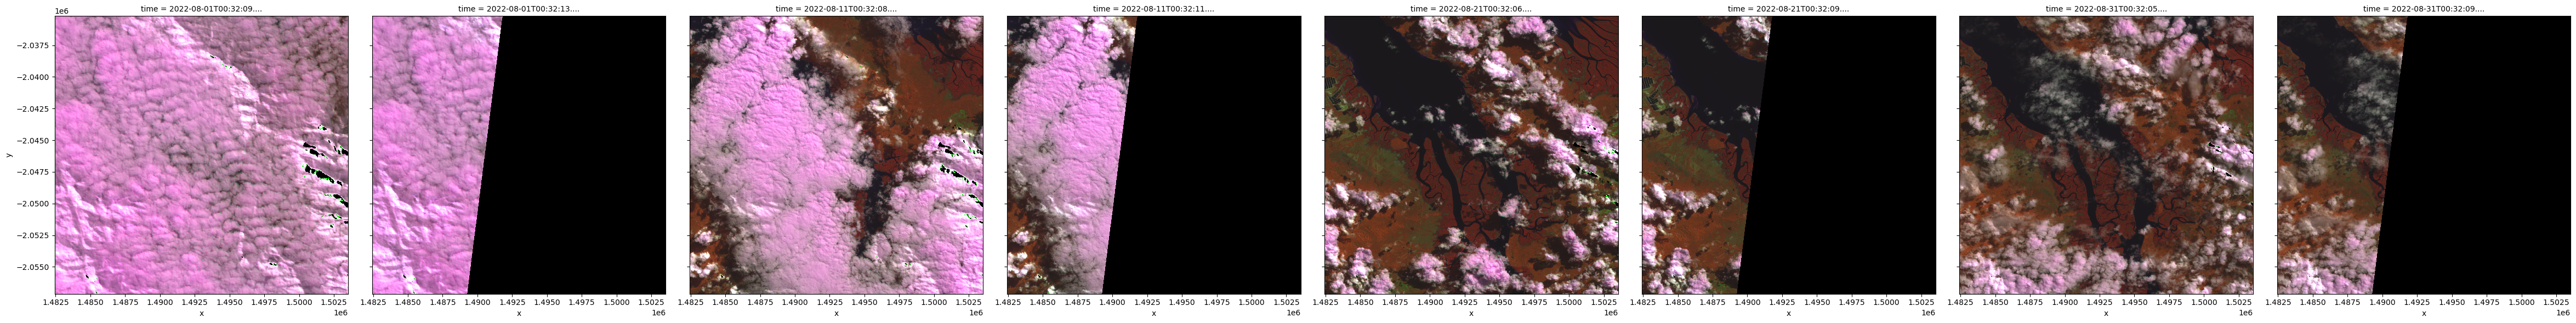

In [9]:
print("Plotting ...")
print("(Please wait until images appear. This may take a few seconds to minutes depending on your period of interest.)")


rgb(ds, bands=["nbart_nir_1", "nbart_swir_2", "nbart_red"], col="time", robust=True, col_wrap=10)

### View specific time steps
* `time_step=n`\
This sets the time step you want to view. 
`n` can be any number from `0` to one fewer than the number of time steps you loaded. 
The number of time steps loaded is given in the print-out of the data, under the `Dimensions` heading. 
As an example, if under `Dimensions:` you see `time: 6`, then there are 6 time steps, and `time_step` can be any number between `0` and `5`.

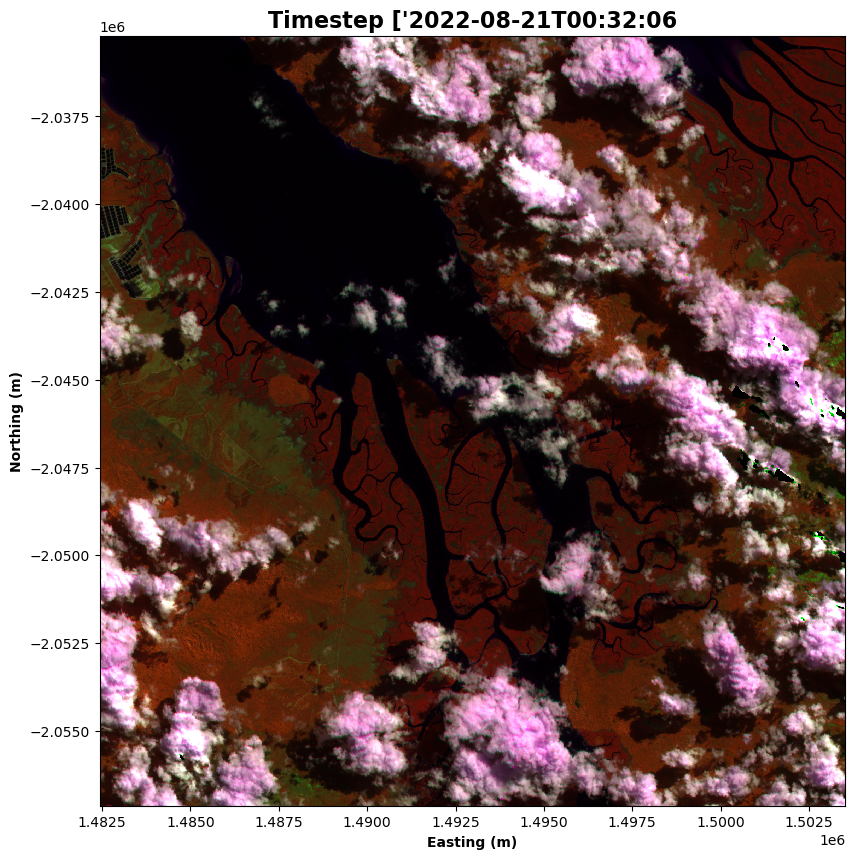

In [10]:
# Set the time step to view (note that 0 is the first image, 1 the second and so on (refer to image above).  -1 is the last image and so on.  You can also try, for example, time_step[4,-1].  
time_step = [4]

# Set the band combination to plot
bands = ["nbart_nir_1", "nbart_swir_2", "nbart_red"]

# Generate the image by running the rgb function
rgb(ds, bands=bands, index=time_step, size=10)

# Format the time stamp for use as the plot title
time_string = str(ds.time.isel(time=time_step).values).split('.')[0]  

# Set the title and axis labels
ax = plt.gca()
ax.set_title(f"Timestep {time_string}", fontweight='bold', fontsize=16)
ax.set_xlabel('Easting (m)', fontweight='bold')
ax.set_ylabel('Northing (m)', fontweight='bold')

# Display the plot
plt.show()

## Step 4: Calculate a spectral index

A wide range of spectral indices are available (see https://www.nv5geospatialsoftware.com/docs/AlphabeticalListSpectralIndices.html) that give more specific information on the environment (e.g., in terms of vegetation health, water quality etc.). However, make note of the specific wavelength regions used as only a selection are relevant to Sentinel-2 data (see https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/).  

In this case, and from the Sentinel-2 data, we will calculate the [Normalised Difference Vegetation Index](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) (NDVI) which is an indicator of vegetation health. The formula is:

$$
\begin{aligned}
\text{NDVI} & = \frac{(\text{NIR} - \text{Red})}{(\text{NIR} + \text{Red})}, \\
\end{aligned}
$$

where $\text{NIR}$ is the near-infrared band of the data, and $\text{Red}$ is the red band.
NDVI values range from -1 to 1, with negative values indicating non-vegetation (such as water) and high values suggesting healthy vegetation (e.g., with a high amount of photosynthetic pigments). 

The following code calculates the top and bottom of the fraction separately, then computes the NDVI value directly from these components.
The calculated NDVI values are stored as their own data array.

In [11]:
# Calculate the components that make up the NDVI calculation
#
#band_diff = ds.nbart_nir_1 - ds.nbart_red
#band_sum = ds.nbart_nir_1 + ds.nbart_red

band_diff = ds.nbart_nir_1 - ds.nbart_red
band_sum = ds.nbart_nir_1 + ds.nbart_red

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum

After calculating the NDVI values, it is possible to plot them by adding the `.plot()` method to `ndvi` (the variable that the values are stored in).
The code below will plot a single image, based on the time selected with the `ndvi_time_step` variable.
Try changing this value to plot the NDVI map at different time steps.
Do you notice any differences?

> **Extension 1**: Sometimes, it is valuable to change the colour scale to something that helps with intuitively understanding the image.
For example, the "viridis" colour map shows high values in greens/yellows (mapping to vegetation), and low values in blue (mapping to water).
Try modifying the `.plot(cmap="RdYlGn")` command below to use `cmap="viridis"` instead.

> **Extension 2**: Below, a single time step is selected using the `.isel()` method.
It is possible to plot all time steps by removing the `.isel()` method, and modifying the `.plot()` method to be `.plot(col="time", col_wrap=3)`.
Plotting all of the time steps at once may make it easier to notice differences in vegetation over time.

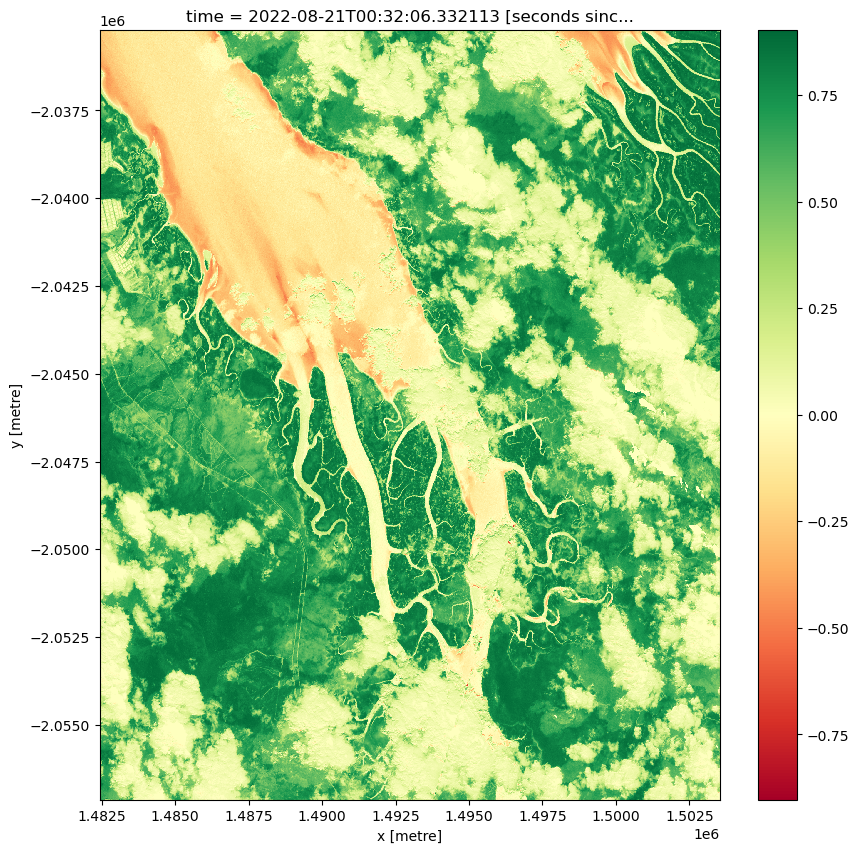

In [12]:
# Set the NDVI time step to view (see above for the reference time)
ndvi_time_step = [4]

# This is the simple way to plot
# Note that high values are likely to be vegetation.
plt.figure(figsize=(10, 10))
ndvi.isel(time=ndvi_time_step).plot(cmap="RdYlGn")
plt.show()

## Step 5: Exporting data

Sometimes, you will want to analyse satellite imagery in a GIS program, such as QGIS or ARCGIS PRO.
The `write_cog()` command from the Open Data Cube library allows loaded data to be exported to GeoTIFF, a commonly used file format for geospatial data.
> **Note**: the saved file will appear in the same directory as this notebook, and it can be downloaded from here for later use.

In [13]:
# Export to a file and name accordingly. Try to standardize and so you can record the date 
#filename = "Hinchinbrook Island Selected Date NDVI.tiff"
filename = "./outputs/Site Name Selected Date NDVI.tiff"

write_cog(geo_im=ndvi.isel(time=time_step), fname=filename, overwrite=True);

## Recommended next steps

### For this notebook
Many of the variables used in this analysis are configurable.
We recommend returning to the beginning of the notebook and re-running the analysis with a different location, dates, measurements, and so on.
This will help give you more understanding for running your own analysis.

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Last modified:** October 2024

**Compatible `datacube` version:** 

In [ ]:
print(datacube.__version__)

## Tags
<!-- Browse all available tags on the DEA User Guide's [Tags Index](https://knowledge.dea.ga.gov.au/genindex/) -->